In [1]:
import numpy as np
import scipy.stats as s

from math import sqrt
from math import factorial as fact
from math import exp

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

%matplotlib inline

In [2]:
# Create functions:

def n_choose_k(n, k):
    return fact(n) / (fact(k)*(fact(n-k)))

def binomial(n, k, p):
    return n_choose_k(n, k) * p**k * (1-p)**(n-k)

def poisson(lam, k):
    return lam**k * exp(-lam) / fact(k)

def myround(x, base=5):
    x = float(int(x*100))
    return int(base * int(x/base))/100 + .05

In [3]:
myround(.18, 5)

0.2

## Bernoulli

Ex. Winter is over and it is time for the Westeros Sports Ball League!  The probability of Wilterfell Direwolves winning any given game is 0.1 (they have sustained heavy losses over the winter).

In [4]:
p_win = .1
p_loss = 1 - p_win

pw = s.bernoulli.pmf(k=1, p=p_win)
pl = s.bernoulli.pmf(k=0, p=p_win)
print("Probability of a win: {:0.2f}, Probability of a loss: {:0.2f}".format(pw, pl))

Probability of a win: 0.10, Probability of a loss: 0.90


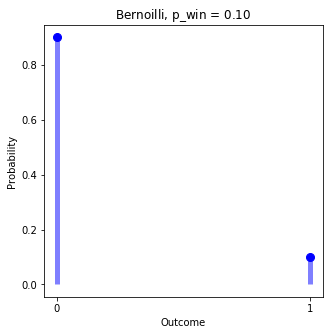

In [5]:
# Plot Bernoulli Distribution

# Create x values
x = np.arange(0, 2)

# Create Plot
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Add Dots
ax.plot(x, s.bernoulli.pmf(k=x, p=p_win), 'bo', ms=8, label='bernoulli pmf')

# Add Vertical lines
ax.vlines(x, 0, s.bernoulli.pmf(k=x, p=p_win), colors='b', lw=5, alpha=0.5)

# Format Axes
ax.set_ylabel('Probability')
ax.set_xlabel('Outcome')
ax.set_xticks(x)

# Set Title
ax.set_title("Bernoilli, p_win = ${:0.2f}$".format(p_win));

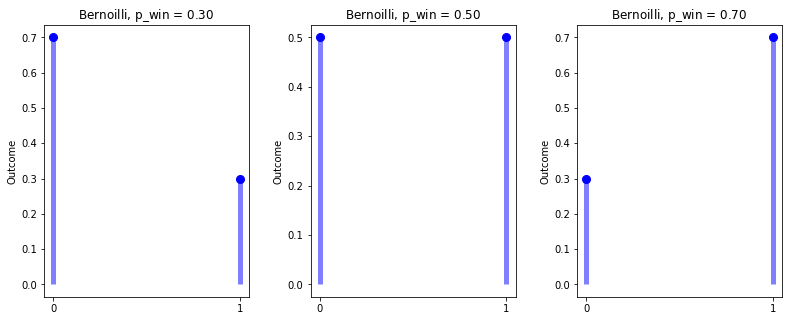

In [6]:
# Plot Bernoulli Distribution

# Create x values
x = np.arange(0, 2)

# Set ps
ps = np.arange(.3, .8, .2)

# Create Plot
fig = plt.figure(figsize=(18, 5))
plot = 1
for p in ps:
    # Add Dots
    ax = fig.add_subplot(1,4,plot)
    ax.plot(x, s.bernoulli.pmf(k=x, p=p), 'bo', ms=8, label='bernoulli pmf')

    # Add Vertical lines
    ax.vlines(x, 0, s.bernoulli.pmf(k=x, p=p), colors='b', lw=5, alpha=0.5)

    # Format Axes
    ax.set_ylabel('Probability')
    ax.set_ylabel('Outcome')
    ax.set_xticks(x)

    # Set Title
    ax.set_title("Bernoilli, p_win = ${:0.2f}$".format(p))
    plot += 1
    
plt.subplots_adjust(wspace=0.3,hspace=.4);

## Binomial

Ex. There are 50 games in the Westeros Sports Ball season. What is the probability of the Direwolves winning 2 games this season?

In [7]:
# Binomial Distribution.

n = 50
p = .1
k = 2
mu = n*p

# Equation
p1 = binomial(n, k, p)

# Scipy Stats PMF
p2 = s.binom.pmf(k=k, n=n, p=p)

# Scipy Stats CMF
p3 = s.binom.cdf(k=k, n=n, p=p) - s.binom.cdf(k=1, n=n, p=p)
print('Formula: {:.4f}, scipy.pmf: {:.4f}, scipy.cdf: {:.4f}'.format(p1, p2, p3))

Formula: 0.0779, scipy.pmf: 0.0779, scipy.cdf: 0.0779


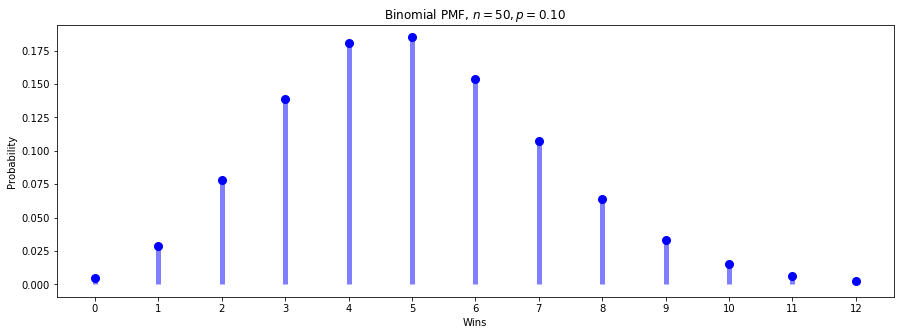

In [8]:
# Plot Binomial Distribution PMF

# Create x values
x = np.arange(s.binom.ppf(.001, n, p), s.binom.ppf(.999, n, p))

# Create plot
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Add Dots
ax.plot(x, s.binom.pmf(x, n, p), 'bo', ms=8, label='binomial pmf')

# Add Vertical lines
ax.vlines(x, 0, s.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

# Format Axes
ax.set_ylabel('Probability')
ax.set_xlabel('Wins')
ax.set_xticks(x)

# Set Title
ax.set_title("Binomial PMF, $n={0}, p = {1:0.2f}$".format(n, p));

Probability of 2 wins is 0.08


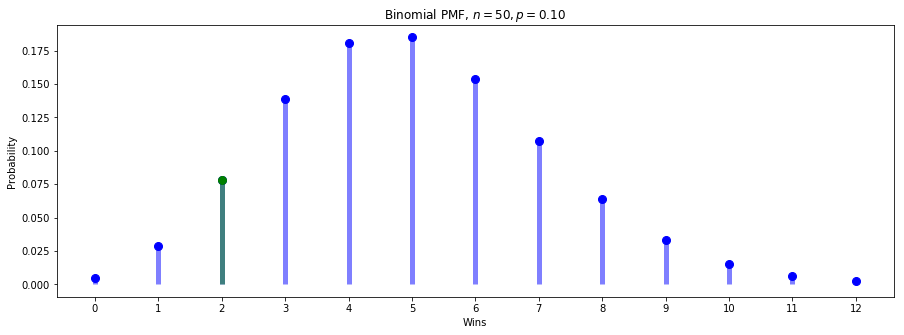

In [9]:
# Plot Binomial Distribution PMF

print("Probability of {} wins is {:.2f}".format(k, p2))

# Create x values
x = np.arange(s.binom.ppf(.001, n, p), s.binom.ppf(.999, n, p))

# Create plot
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Add Dots
ax.plot(x, s.binom.pmf(x, n, p), 'bo', ms=8, label='binomial pmf')
ax.plot(k, s.binom.pmf(k, n, p), 'go', ms=8, label='binomial pmf')

# Add Vertical lines
ax.vlines(x, 0, s.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ax.vlines(k, 0, s.binom.pmf(k, n, p), colors='g', lw=5, alpha=0.5)

# Format Axes
ax.set_ylabel('Probability')
ax.set_xlabel('Wins')
ax.set_xticks(x)

# Set Title
ax.set_title("Binomial PMF, $n={0}, p = {1:0.2f}$".format(n, p));

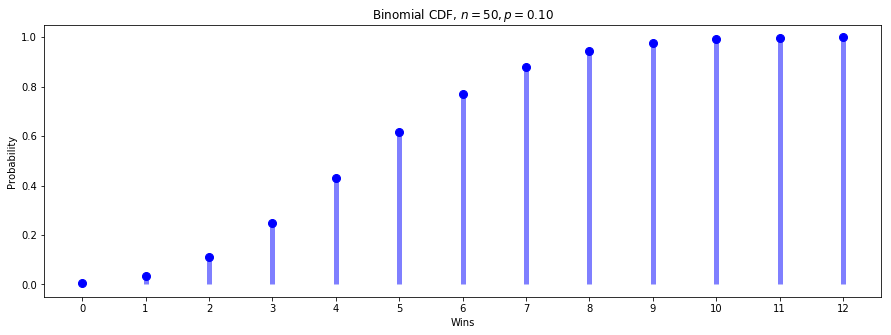

In [10]:
# Plot Binomial Distribution CMF

# Create x values
x = np.arange(s.binom.ppf(.001, n, p), s.binom.ppf(.999, n, p))

# Create plot
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Add Dots
ax.plot(x, s.binom.cdf(x, n, p), 'bo', ms=8, label='binomial cmf')

# Add Vertical lines
ax.vlines(x, 0, s.binom.cdf(x, n, p), colors='b', lw=5, alpha=0.5)

# Format Axes
ax.set_ylabel('Probability')
ax.set_xlabel('Wins')
ax.set_xticks(x)

# Set Title
ax.set_title("Binomial CDF, $n={0}, p = {1:0.2f}$".format(n, p));

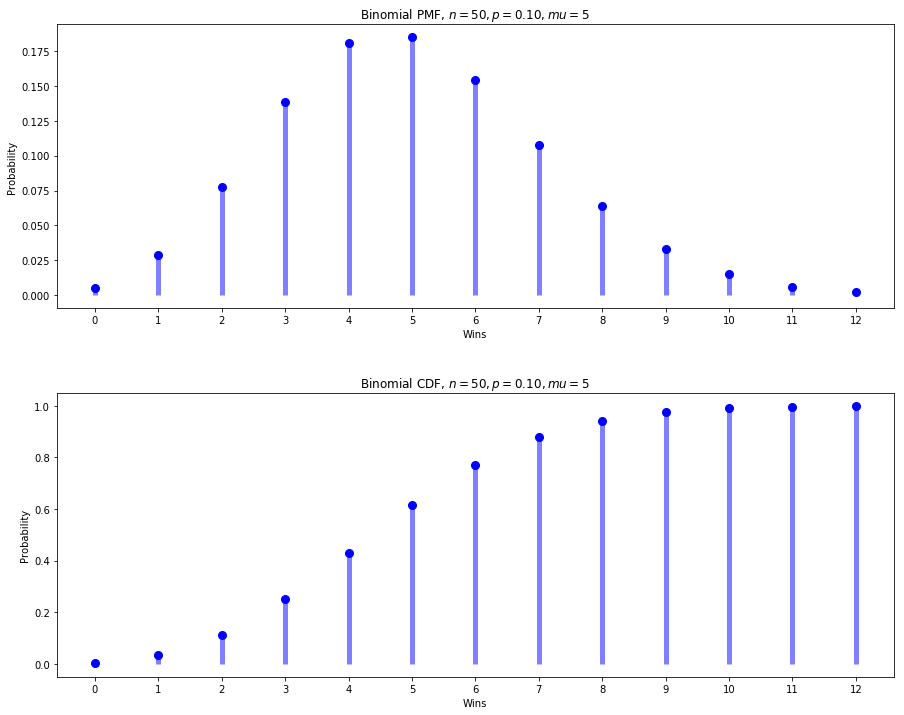

In [11]:
# Plot Binomial Distribution PMF and CMF

# Create Plot
fig = plt.figure(figsize=(15, 12))

# Top Plot
ax1 = fig.add_subplot(211)

# Add Dots
ax1.plot(x, s.binom.pmf(x, n, p), 'bo', ms=8, label='Binomial PMF')

# Add Verical Lines
ax1.vlines(x, 0, s.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

# Format Axes
ax1.set_ylabel('Probability')
ax1.set_xlabel('Wins')
ax1.set_xticks(x)

# Set Title
ax1.set_title("Binomial PMF, $n={}, p = {:0.2f}, mu = {}$".format(n, p, int(n*p)))

# Bottom Plot
ax2 = fig.add_subplot(212)

# Add Dots
ax2.plot(x, s.binom.cdf(x, n, p), 'bo', ms=8, label='Binomial CMF')

# Add Vertical Lines
ax2.vlines(x, 0, s.binom.cdf(x, n, p), colors='b', lw=5, alpha=0.5)

# Format Axes
ax2.set_ylabel('Probability')
ax2.set_xlabel('Wins')
ax2.set_xticks(x)

# Set Title
ax2.set_title("Binomial CDF, $n={}, p = {:0.2f}, mu = {}$".format(n, p, int(n*p)))

## adjust the space between plots
plt.subplots_adjust(wspace=0.2,hspace=.3);

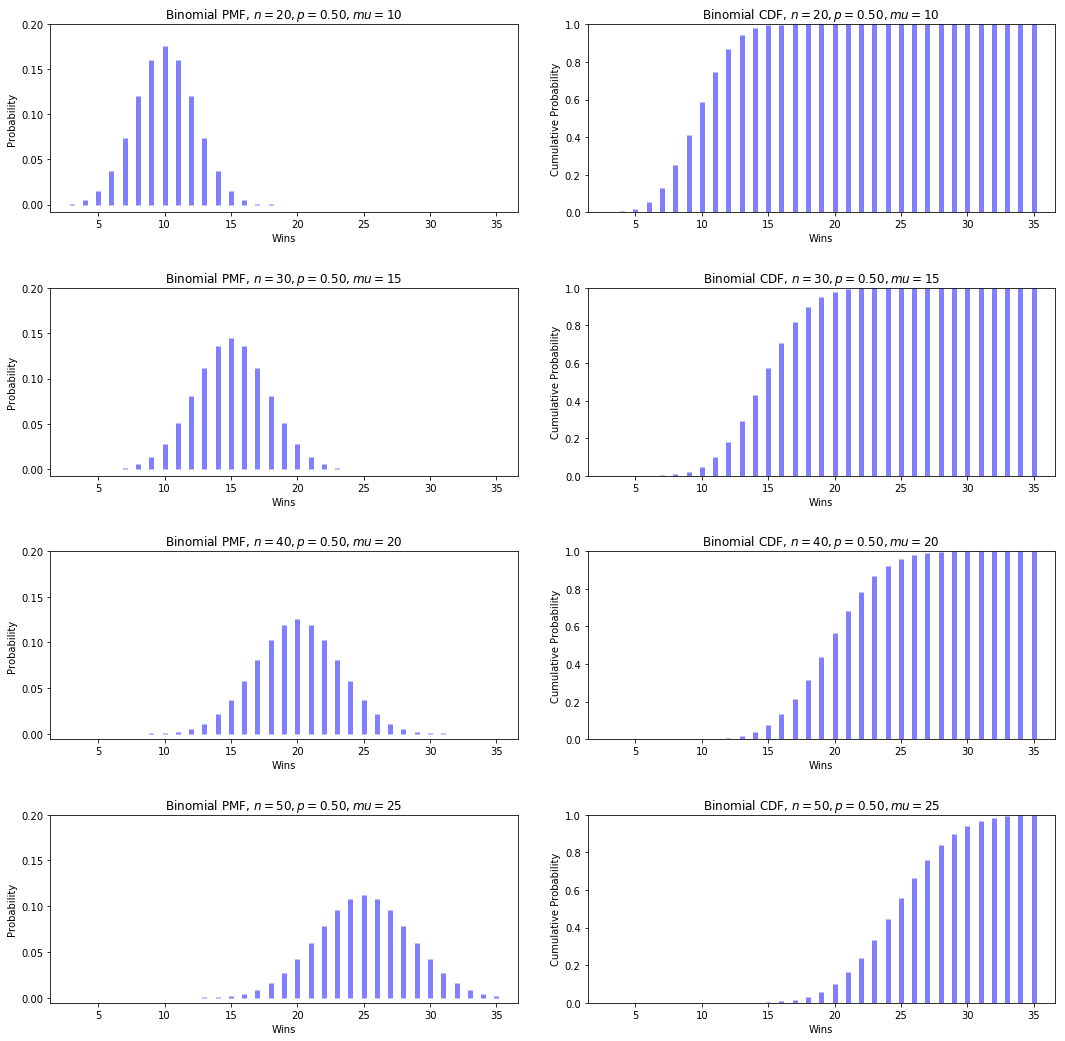

In [12]:
# Changing n

# set p
p = .5
mu = n*p

# Plot Binomial Distribution PMF

# ns
ns = np.arange(20, 60, 10)

# Find min and max x and y values for plots
min_x = p*n
max_x = p*n
max_y = 0
for n in ns:
    min_x_test = s.binom.ppf(.001, n, p)
    max_x_test = s.binom.ppf(.999, n, p)
    if min_x_test < min_x:
        min_x = min_x_test
    if max_x_test > max_x:
        max_x = max_x_test
        
    max_y_test = np.max(s.binom.pmf(x, n, p))
    if max_y_test > max_y:
        max_y = max_y_test

max_y = myround(max_y, 5) + .01

# Create x values
x = np.arange(min_x, max_x, 1)

# Create Plot
fig = plt.figure(figsize=(18, 18))
 
plot = 1
    
for n in ns:
    # Add PMFs
    ax = fig.add_subplot(len(ns),2, plot)
    ax.vlines(x, 0, s.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
    ax.set_yticks(np.arange(0, max_y, 0.05))
    ax.set_ylabel("Probability")
    ax.set_xlabel("Wins")
    ax.set_title("Binomial PMF, $n={}, p = {:0.2f}, mu = {}$".format(n, p, int(n*p)))
    
    # Add CMFs
    plot += 1
    ax = fig.add_subplot(len(ns),2, plot)
    ax.vlines(x, 0, s.binom.cdf(x, n, p), colors='b', lw=5, alpha=0.5)
    ax.set_ylim(0,1)
    ax.set_ylabel("Cumulative Probability")
    ax.set_xlabel("Wins")
    ax.set_title("Binomial CDF, $n={}, p = {:0.2f}, mu = {}$".format(n, p, int(n*p)))
    
    plot += 1
    
    
plt.subplots_adjust(wspace=0.15,hspace=.4);

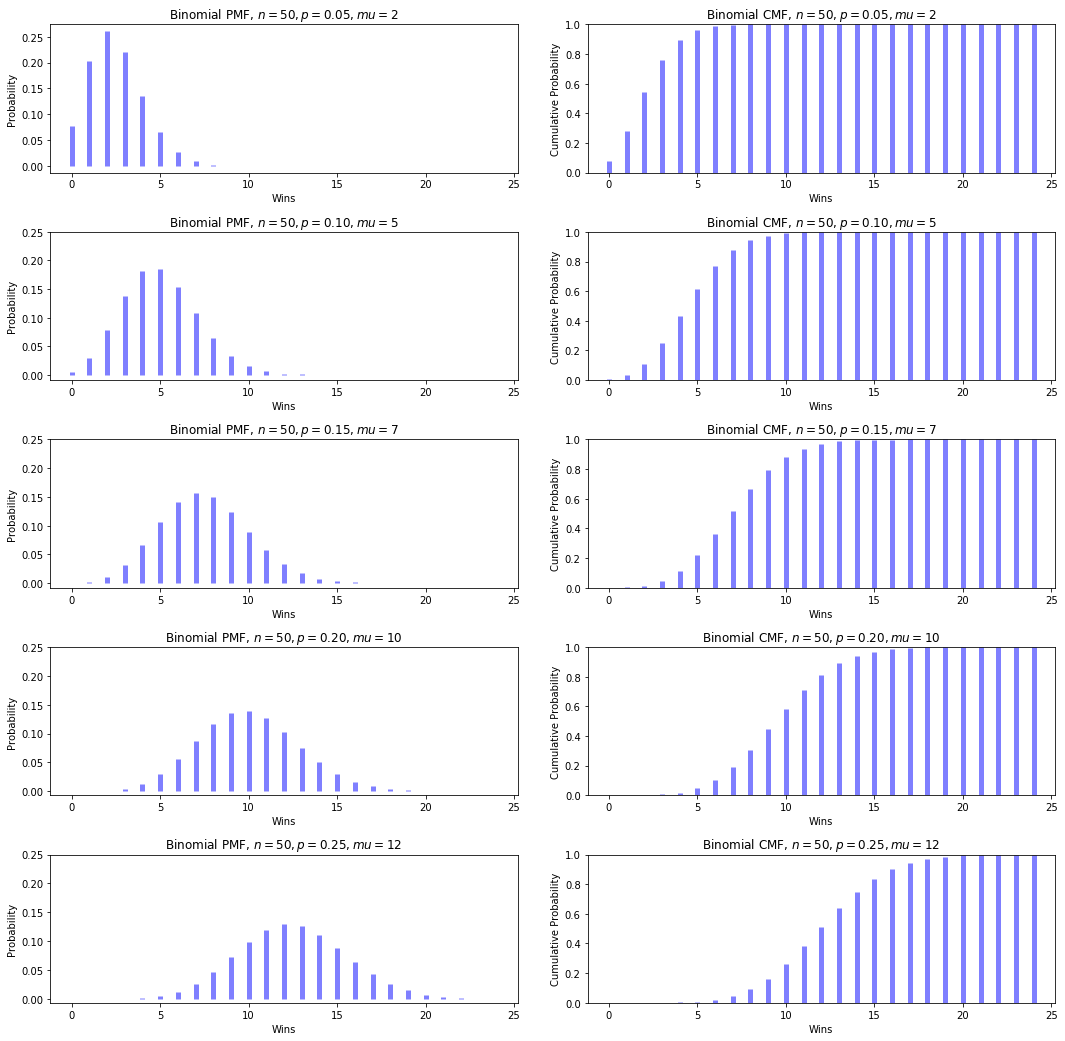

In [13]:
# Changing p
# Plot Binomial Distribution PMF

# set n
n = 50

# ps
ps = np.arange(.05, .3, .05)

# Find min and max x and y values for plots
min_x = p*n
max_x = p*n
max_y = 0
for p in ps:
    min_x_test = s.binom.ppf(.001, n, p)
    max_x_test = s.binom.ppf(.999, n, p)
    if min_x_test < min_x:
        min_x = min_x_test
    if max_x_test > max_x:
        max_x = max_x_test
        
    max_y_test = np.max(s.binom.pmf(x, n, p))
    if max_y_test > max_y:
        max_y = max_y_test

max_y = myround(max_y, 5) + .01

# Create x values
x = np.arange(min_x, max_x, 1)

# Create Plot
fig = plt.figure(figsize=(18, 18))
 
plot = 1
    
for p in ps:
    # Add PMFs
    ax = fig.add_subplot(len(ps),2, plot)
    ax.vlines(x, 0, s.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
    ax.set_yticks(np.arange(0, max_y, 0.05))
    ax.set_ylabel("Probability")
    ax.set_xlabel("Wins")
    ax.set_title("Binomial PMF, $n={}, p = {:0.2f}, mu = {}$".format(n, p, int(n*p)))
    
    # Add CMFs
    plot += 1
    ax = fig.add_subplot(len(ps),2, plot)
    ax.vlines(x, 0, s.binom.cdf(x, n, p), colors='b', lw=5, alpha=0.5)
    ax.set_ylim(0,1)
    ax.set_ylabel("Cumulative Probability")
    ax.set_xlabel("Wins")
    ax.set_title("Binomial CMF, $n={}, p = {:0.2f}, mu = {}$".format(n, p, int(n*p)))
    
    plot += 1
    
    
plt.subplots_adjust(wspace=0.15,hspace=.4);

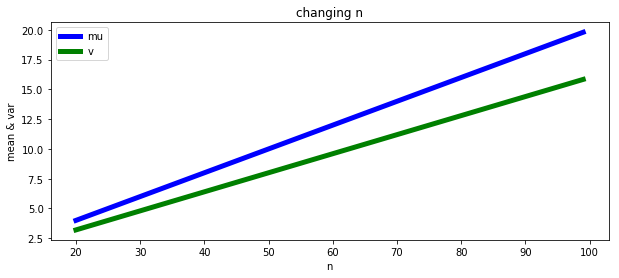

In [14]:

p = .2
ns = range(20, 100)
mu = []
v = []
for n in ns:
    mu.append(n*p)
    v.append(n*p*(1-p))

# Create Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

color=iter(cm.rainbow(np.linspace(0,1,n)))


ax.plot(ns, mu, color='b', lw=5, ms=8, label="mu")
ax.plot(ns, v, color='g', lw=5, ms=8, label="v")

    
ax.set_ylabel("mean & var")
ax.set_xlabel("n")
ax.legend()
ax.set_title("changing n");

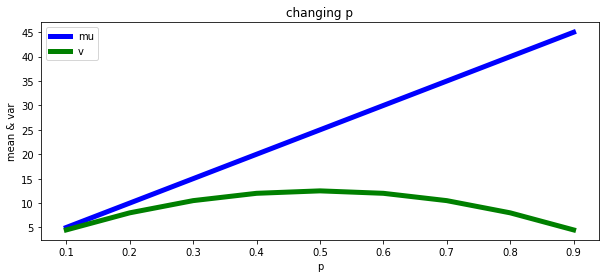

In [15]:
n = 50
ps = np.arange(.1, 1., .1)
mu = []
v = []
for p in ps:
    mu.append(n*p)
    v.append(n*p*(1-p))

# Create Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

color=iter(cm.rainbow(np.linspace(0,1,n)))


ax.plot(ps, mu, color='b', lw=5, ms=8, label="mu")
ax.plot(ps, v, color='g', lw=5, ms=8, label="v")

    
ax.set_ylabel("mean & var")
ax.set_xlabel("p")
ax.legend()
ax.set_title("changing p");

## Poisson

Ex. The thirsty Direwolf fans go through 10 barrels of ale per game on average.  What is the probability that they would only go through 3?

In [16]:
# Poisson Distribution.

lam = 10
k = 3

# Equation
poisson1 = poisson(lam=lam, k=k)

# Scipy Stats PMF
poisson2 = s.poisson.pmf(k=k, mu=lam)

# Scipy Stats CMF
poisson3 = s.poisson.cdf(k=k, mu=lam) - s.poisson.cdf(k=2, mu=lam) - s.poisson.cdf(k=1, mu=lam)
print('Formula: {:.4f}, scipy.pmf: {:.4f}, scipy.cdf: {:.4f}'.format(poisson1, poisson2, poisson3))

Formula: 0.0076, scipy.pmf: 0.0076, scipy.cdf: 0.0071


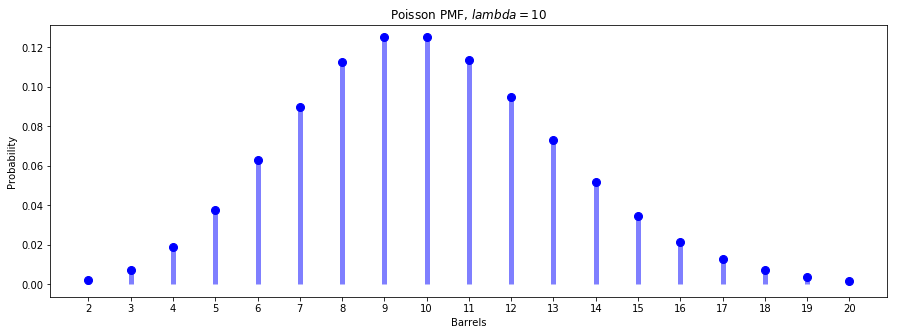

In [17]:
# Plot Poisson Distribution PMF

# Create x values
x = np.arange(s.poisson.ppf(.001, lam), s.poisson.ppf(.999, lam), 1)

# Create Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Add Dots
ax.plot(x, s.poisson.pmf(k=x, mu=lam), 'bo', ms=8, label='Poisson pmf')

# Add Verical Lines
ax.vlines(x, 0, s.poisson.pmf(k=x, mu=lam), colors='b', lw=5, alpha=0.5)

# Format Axes
ax.set_ylabel('Probability')
ax.set_xlabel('Barrels')
ax.set_xticks(x)

# Set Title
ax.set_title("Poisson PMF, $lambda={0}$".format(lam));

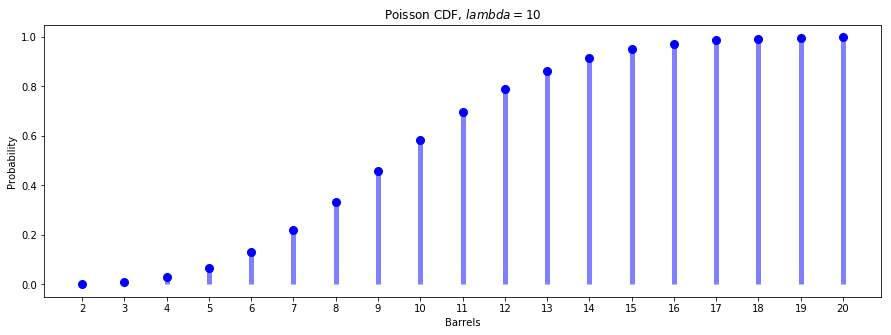

In [18]:
# Plot Poisson Distribution CDF

# Create x values
x = np.arange(s.poisson.ppf(.001, lam), s.poisson.ppf(.999, lam))

# Create Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Add Dots
ax.plot(x, s.poisson.cdf(k=x, mu=lam), 'bo', ms=8, label='Poisson cmf')

# Add Vertical Lines
ax.vlines(x, 0, s.poisson.cdf(k=x, mu=lam), colors='b', lw=5, alpha=0.5)

# Format Axes
ax.set_ylabel('Probability')
ax.set_xlabel('Barrels')
ax.set_xticks(x)

# Set Title
ax.set_title("Poisson CDF, $lambda={0}$".format(lam));

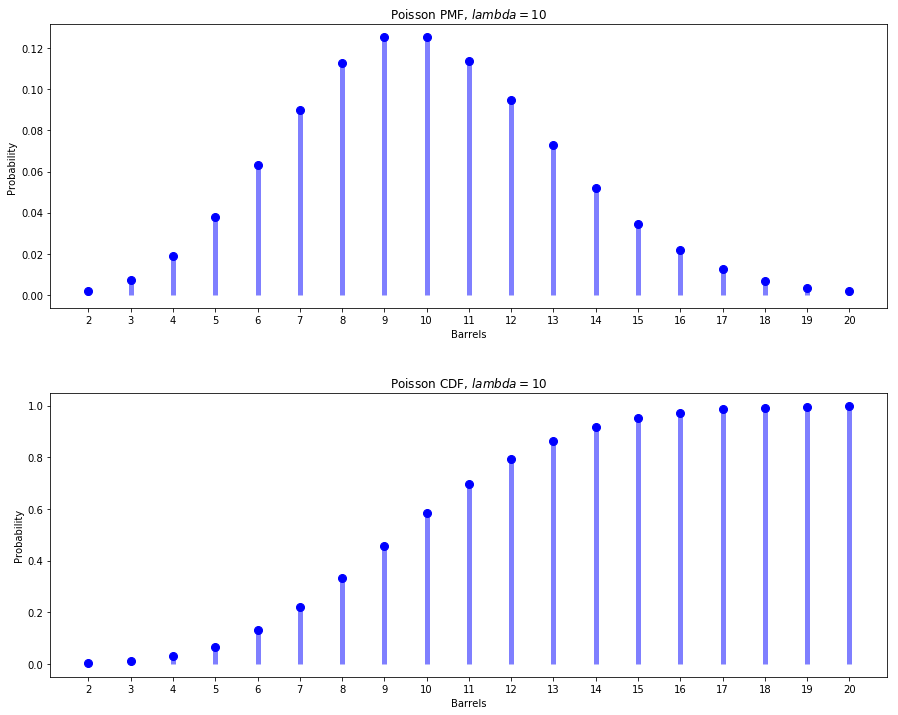

In [19]:
# Plot Poisson Distribution PMF and CMF

# Create x values
x = np.arange(s.poisson.ppf(.001, lam), s.poisson.ppf(.999, lam), 1)

# Create Plot
fig = plt.figure(figsize=(15, 12))

# Top Plot
ax1 = fig.add_subplot(211)

# Add Dots
ax1.plot(x, s.poisson.pmf(k=x, mu=lam), 'bo', ms=8, label='Poisson pmf')

# Add Verical Lines
ax1.vlines(x, 0, s.poisson.pmf(k=x, mu=lam), colors='b', lw=5, alpha=0.5)

# Format Axes
ax1.set_ylabel('Probability')
ax1.set_xlabel('Barrels')
ax1.set_xticks(x)

# Set Title
ax1.set_title("Poisson PMF, $lambda={0}$".format(lam))

# Bottom Plot
ax2 = fig.add_subplot(212)

# Add Dots
ax2.plot(x, s.poisson.cdf(k=x, mu=lam), 'bo', ms=8, label='Poisson cmf')

# Add Vertical Lines
ax2.vlines(x, 0, s.poisson.cdf(k=x, mu=lam), colors='b', lw=5, alpha=0.5)

# Format Axes
ax2.set_ylabel('Probability')
ax2.set_xlabel('Barrels')
ax2.set_xticks(x)

# Set Title
ax2.set_title("Poisson CDF, $lambda={0}$".format(lam))

## adjust the space between plots
plt.subplots_adjust(wspace=0.2,hspace=.3);

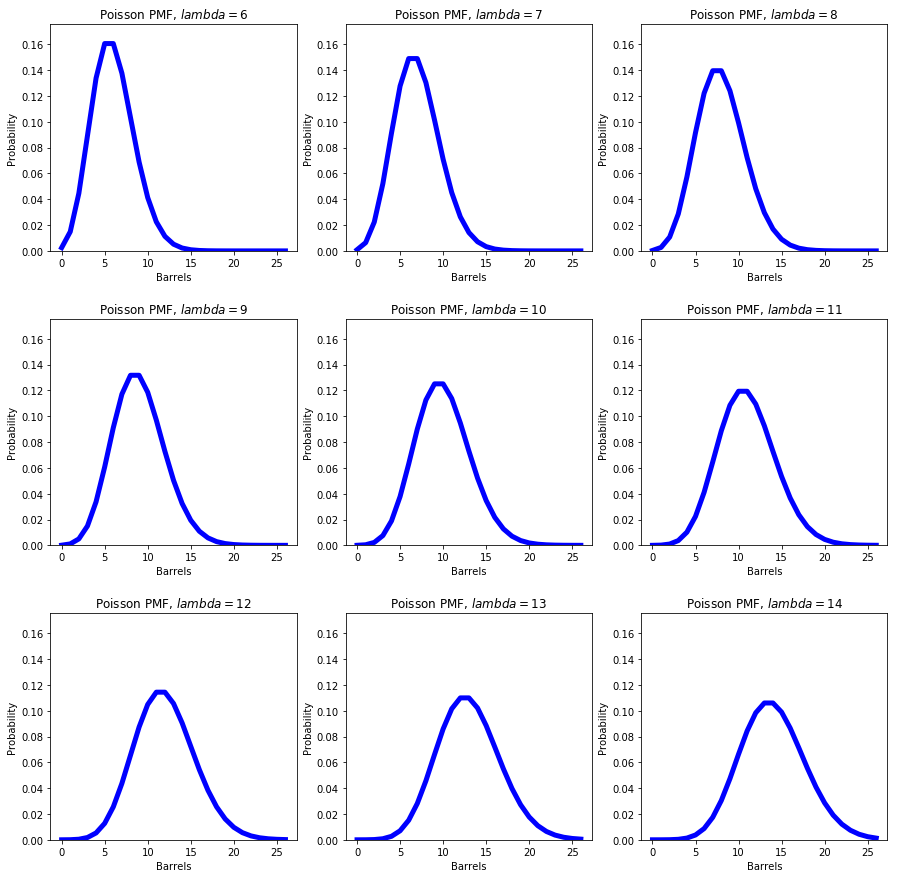

In [20]:
# Changing Lambda
# Plot Poisson Distribution PMF

# Lambdas
lams = np.arange(5, 15)

# Create x values
min_x = lam
max_x = lam
for lam in lams:
    min_x_test = s.poisson.ppf(.001, lam)
    max_x_test = s.poisson.ppf(.999, lam)
    if min_x_test < min_x:
        min_x = min_x_test
    if max_x_test > max_x:
        max_x = max_x_test

x = np.arange(min_x, max_x, 1)

# find max y value
max_y = 0
for lam in lams:
    max_y_test = np.max(s.poisson.pmf(k=x, mu=lam))
    if max_y_test > max_y:
        max_y = max_y_test

# Create Plot
fig = plt.figure(figsize=(15, 15))
    
for i in range(1, len(lams)):
    ax = fig.add_subplot(3, 3, i)
    ax.plot(x, s.poisson.pmf(k=x, mu=lams[i]), color='blue', lw=5, ms=8, label='poisson pmf')
    ax.set_ylim(0,max_y)
    ax.set_ylabel("Probability")
    ax.set_xlabel("Barrels")
    ax.set_title("Poisson PMF, $lambda={0}$".format(lams[i]))

# plt.title("Poisson at Changing Lambdas")
plt.subplots_adjust(wspace=0.2,hspace=.3);

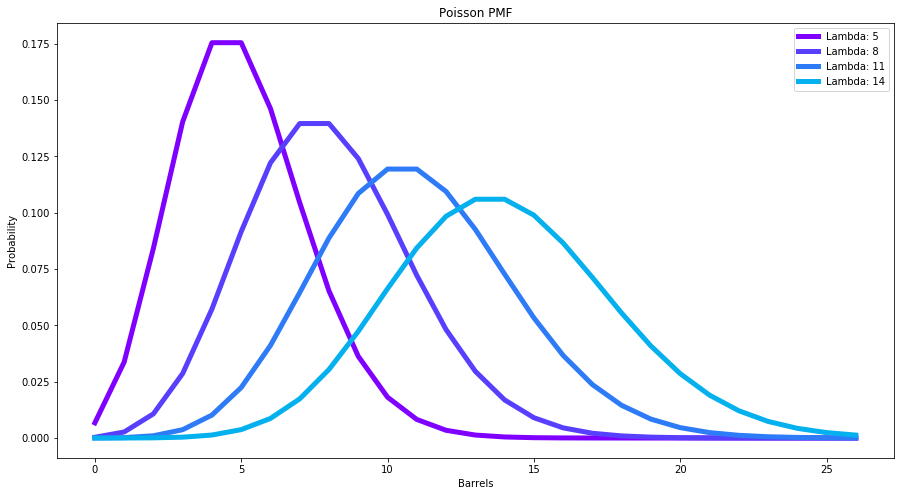

In [21]:
# Changing Lambda
# Plot Poisson Distribution PMF

# Lambdas
lams = np.arange(5, 15, 3)

# Create x values
min_x = lam
max_x = lam
for lam in lams:
    min_x_test = s.poisson.ppf(.001, lam)
    max_x_test = s.poisson.ppf(.999, lam)
    if min_x_test < min_x:
        min_x = min_x_test
    if max_x_test > max_x:
        max_x = max_x_test

x = np.arange(min_x, max_x, 1)

# Create Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

color=iter(cm.rainbow(np.linspace(0,1,n)))

for i in range(len(lams)):
    line = ax.plot(x, s.poisson.pmf(k=x, mu=lams[i]), color=next(color), lw=5, ms=8, label="Lambda: {}".format(lams[i]))
    next(color)
    next(color)
    next(color)
    
ax.set_ylabel("Probability")
ax.set_xlabel("Barrels")
ax.legend()
ax.set_title("Poisson PMF");

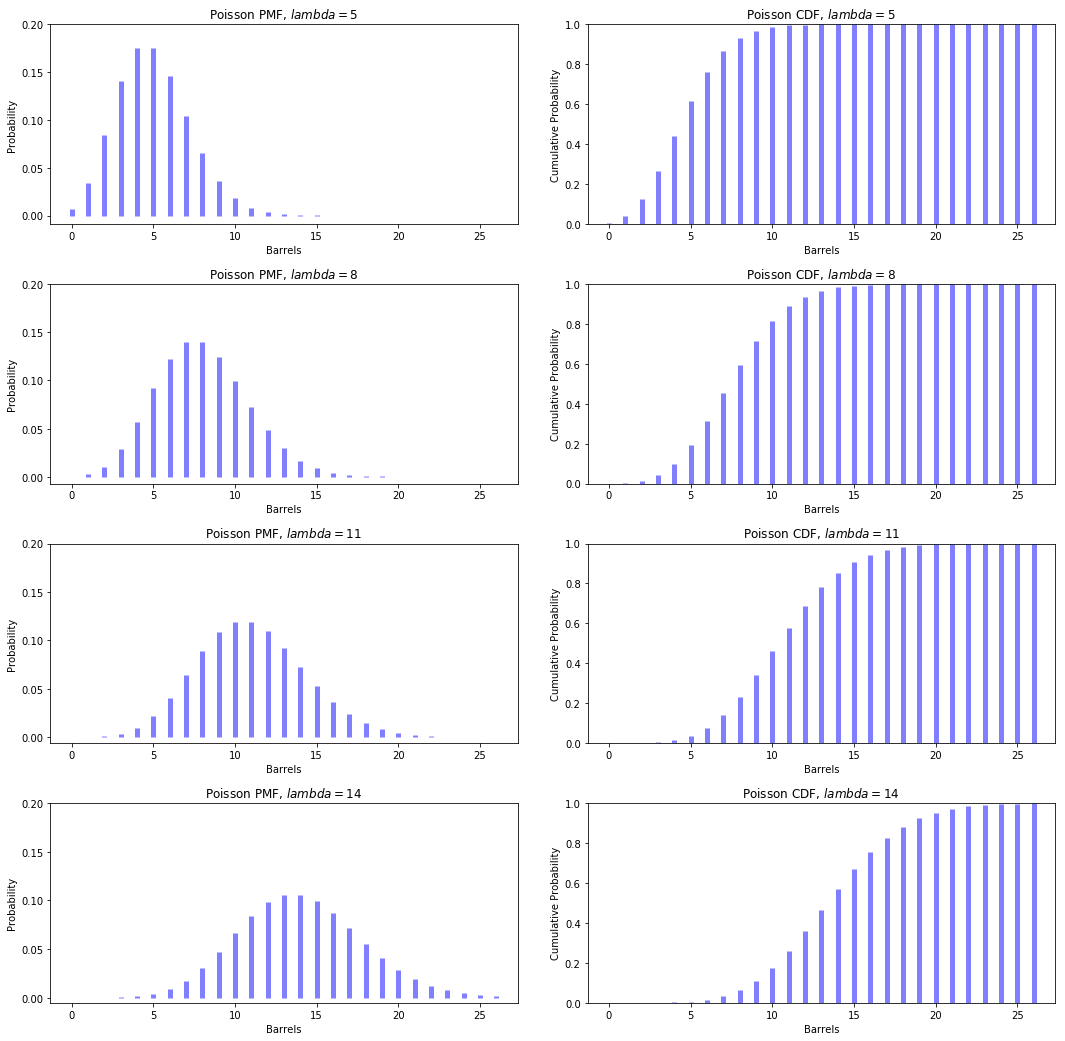

In [22]:
# Changing Lambda
# Plot Poisson Distribution PMF

# Lambdas
lams = np.arange(5, 15, 3)

# Create x values
min_x = lam
max_x = lam
for lam in lams:
    min_x_test = s.poisson.ppf(.001, lam)
    max_x_test = s.poisson.ppf(.999, lam)
    if min_x_test < min_x:
        min_x = min_x_test
    if max_x_test > max_x:
        max_x = max_x_test

x = np.arange(min_x, max_x, 1)

# find max y value
max_y = 0
for lam in lams:
    max_y_test = np.max(s.poisson.pmf(k=x, mu=lam))
    if max_y_test > max_y:
        max_y = max_y_test
max_y = myround(max_y, 5) + .01

# Create Plot
fig = plt.figure(figsize=(18, 18))
 
plot = 1
    
for lam in lams:
    # Add PMFs
    ax = fig.add_subplot(len(lams),2, plot)
    ax.vlines(x, 0, s.poisson.pmf(k=x, mu=lam), colors='b', lw=5, alpha=0.5)
    ax.set_yticks(np.arange(0, max_y, 0.05))
    ax.set_ylabel("Probability")
    ax.set_xlabel("Barrels")
    ax.set_title("Poisson PMF, $lambda={0}$".format(lam))
    
    # Add CMFs
    plot += 1
    ax = fig.add_subplot(len(lams),2, plot)
    ax.vlines(x, 0, s.poisson.cdf(k=x, mu=lam), colors='b', lw=5, alpha=0.5)
    ax.set_ylim(0,1)
    ax.set_ylabel("Cumulative Probability")
    ax.set_xlabel("Barrels")
    ax.set_title("Poisson CDF, $lambda={0}$".format(lam))
    
    plot += 1
    
    
plt.subplots_adjust(wspace=0.15,hspace=.3);